In [37]:
%matplotlib inline

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
import statistics

In [3]:
#file to load
cityDataToLoad = 'resources/city_data.csv'
rideDataToLoad = 'resources/ride_data.csv'



In [5]:
cityDataDf = pd.read_csv(cityDataToLoad)
cityDataDf

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [7]:
rideDataDf = pd.read_csv(rideDataToLoad)
rideDataDf

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [9]:
#chekcing data types and data info
cityDataDf.dtypes
cityDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [10]:
#counting all records
cityDataDf.count()

city            120
driver_count    120
type            120
dtype: int64

In [11]:
#double check, no null values
cityDataDf.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
cityDataDf['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
urbanCount = sum(cityDataDf['type']=='Urban')
urbanCount

66

In [15]:
suburbCount = sum(cityDataDf['type']=='Suburban')
suburbCount

36

In [16]:
ruralCount = sum(cityDataDf['type']=='Rural')
ruralCount

18

In [17]:
rideDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [18]:
rideDataDf.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [20]:
pyBerDataComplete = pd.merge(rideDataDf,cityDataDf, how = 'left',on=['city','city'])
pyBerDataComplete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
urbanCitiesDf = pyBerDataComplete[pyBerDataComplete['type']=='Urban']
urbanCitiesDf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [22]:
suburbCitiesDf = pyBerDataComplete[pyBerDataComplete['type']=='Suburban']
suburbCitiesDf.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [23]:
ruralCitiesDf = pyBerDataComplete[pyBerDataComplete['type']=='Rural']
ruralCitiesDf.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [25]:
urbanRideCount = urbanCitiesDf.groupby(['city']).count()['ride_id']
urbanRideCount.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [26]:
suburbRideCount = suburbCitiesDf.groupby(['city']).count()['ride_id']
suburbRideCount.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [27]:
ruralRideCount = ruralCitiesDf.groupby(['city']).count()['ride_id']
ruralRideCount.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [44]:
urbanFareMean = urbanCitiesDf.groupby(['city']).mean()['fare']
urbanFareMean.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [46]:
suburbFareMean = suburbCitiesDf.groupby(['city']).mean()['fare']
suburbFareMean.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [47]:
ruralFareMean = ruralCitiesDf.groupby(['city']).mean()['fare']
ruralFareMean.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [33]:
urbanDriversMean = urbanCitiesDf.groupby(['city']).mean()['driver_count']
urbanDriversMean.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [34]:
suburbDriversMean = suburbCitiesDf.groupby(['city']).mean()['driver_count']
suburbDriversMean.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [35]:
ruralDriversMean = ruralCitiesDf.groupby(['city']).mean()['driver_count']
ruralDriversMean.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

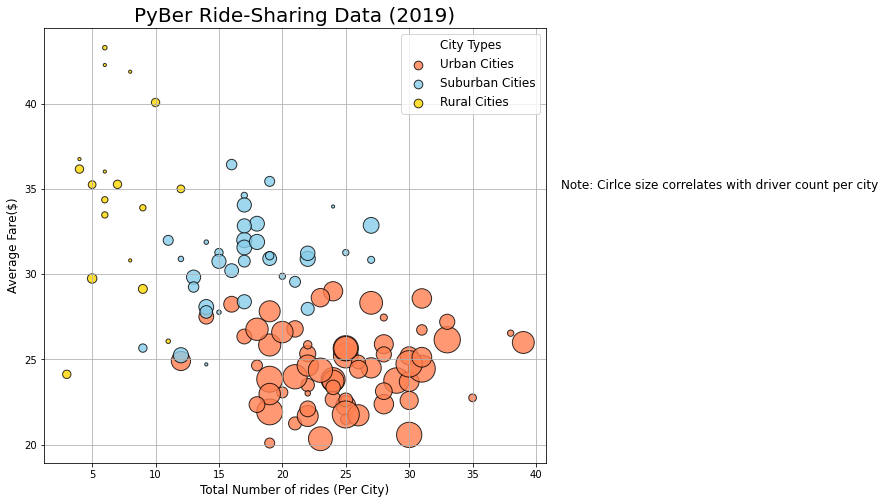

In [76]:
#Create bubble plot and save the figure in analysis folder
plt.subplots(figsize=(9,8))
plt.scatter(urbanRideCount,urbanFareMean,s=10*urbanDriversMean,color='coral',label='Urban Cities',edgecolor='black',linewidths=1,alpha=0.8)
plt.scatter(suburbRideCount, suburbFareMean,s=10*suburbDriversMean,color='skyblue',label='Suburban Cities',edgecolor='black',linewidths=1,alpha=0.8)
plt.scatter(ruralRideCount,ruralFareMean,s=10*ruralDriversMean,color='gold',label='Rural Cities',edgecolor='black',linewidths=1,alpha=0.8)
plt.title('PyBer Ride-Sharing Data (2019)', fontsize = 20)
plt.xlabel('Total Number of rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare($)', fontsize = 12)
plt.grid(True)
lgnd = plt.legend(fontsize='12',mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35, 'Note: Cirlce size correlates with driver count per city', fontsize='12')
plt.savefig('analysis/Fig1.png')
plt.show()


<Figure size 432x288 with 0 Axes>